#### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = boston.data

In [4]:
feature_names = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns=feature_names)

In [6]:
y = boston.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [13]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [17]:
X_train_tsne.shape

(404, 2)

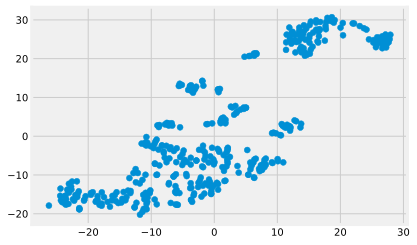

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [21]:
train_labels = model.fit_predict(X_train_scaled)

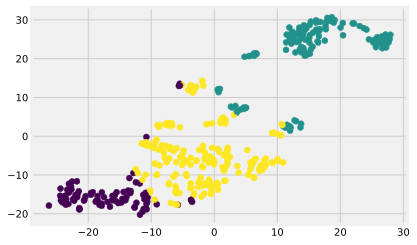

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [23]:
y_train[train_labels==0].mean()

27.78837209302326

In [24]:
y_train[train_labels==1].mean()

16.165354330708663

In [25]:
y_train[train_labels==2].mean()

24.958115183246072

Text(0.5, 0, 'Price')

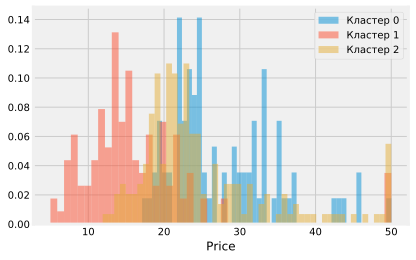

In [26]:
plt.hist(y_train[train_labels==0], bins = 50, density = True, alpha=0.5)
plt.hist(y_train[train_labels==1], bins = 50, density = True, alpha=0.5)
plt.hist(y_train[train_labels==2], bins = 50, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Price')

In [27]:
X_train.loc[train_labels==0, 'CRIM'].mean()

0.07356558139534886

In [28]:
X_train.loc[train_labels==1, 'CRIM'].mean()

10.797028425196853

In [29]:
X_train.loc[train_labels==2, 'CRIM'].mean()

0.42166020942408367

Text(0.5, 0, 'CRIM')

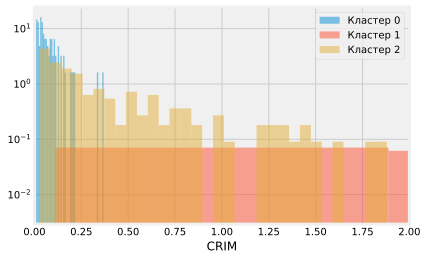

In [30]:
plt.hist(X_train.loc[train_labels==0, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.hist(X_train.loc[train_labels==1, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.hist(X_train.loc[train_labels==2, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.xlim(0, 2)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

#### Задание 3

In [31]:
test_labels = model.predict(X_test_scaled)

In [32]:
y_test[test_labels==0].mean()

31.35

In [33]:
y_test[test_labels==1].mean()

16.43714285714286

In [34]:
y_test[test_labels==2].mean()

21.860784313725492

Text(0.5, 0, 'Price')

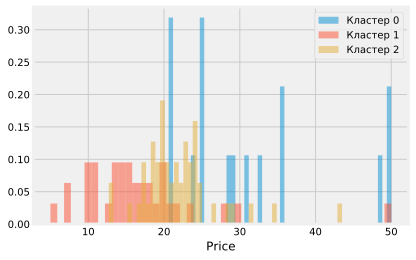

In [35]:
plt.hist(y_test[test_labels==0], bins = 50, density = True, alpha=0.5)
plt.hist(y_test[test_labels==1], bins = 50, density = True, alpha=0.5)
plt.hist(y_test[test_labels==2], bins = 50, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Price')

In [37]:
X_test.loc[test_labels==0, 'CRIM'].mean()

0.062060000000000004

In [38]:
X_test.loc[test_labels==1, 'CRIM'].mean()

10.165531142857143

In [39]:
X_test.loc[test_labels==2, 'CRIM'].mean()

0.26607882352941176

Text(0.5, 0, 'CRIM')

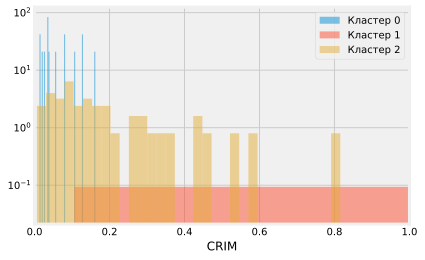

In [40]:
plt.hist(X_test.loc[test_labels==0, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.hist(X_test.loc[test_labels==1, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.hist(X_test.loc[test_labels==2, 'CRIM'], bins = 50, density = True, alpha=0.5, log=True)
plt.xlim(0, 1)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')